In [373]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats
from scipy.stats import bootstrap
import scipy.interpolate as interpolate
from scipy.signal import correlate
from scipy.signal import correlation_lags
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import statsmodels.api as sm

In [374]:
# reading in the files 
file_path = '/Users/haley/Research/COLDEX/COLDEX/AllanHills_CMC1/AH Variability (Abel)/'
side2_df = pd.read_csv(file_path + 'OSU_Ice_full.csv')
side2_orig = side2_df

In [375]:
file_path = '/Users/haley/Research/COLDEX/COLDEX/AllanHills_CMC1/AH Top Data (Phoenix)/'
side1_df = pd.read_csv(file_path + 'All_phoenix_data_simplified.csv')
side1_run1 = side1_df[0:265]
side1_run2 = side1_df[265:]

In [376]:
# defining data's variables 
side1_run1_depth = side1_run1['Depth']
side1_run2_depth = side1_run2['Depth']
side2_orig_depth = side2_orig['Depth']
# side2_dup_depth = side2_dup['Depth']

side1_run1_dD = side1_run1['dD_vsmow']
side1_run2_dD = side1_run2['dD_vsmow']
side2_orig_dD = side2_orig['dD_vsmow']
# side2_dup_dD = side2_dup['dD_vsmow']

side1_run1_d18O = side1_run1['d18O_vsmow']
side1_run2_d18O = side1_run2['d18O_vsmow']
side2_orig_d18O = side2_orig['d18O_vsmow']
# side2_dup_d18O = side2_dup['d18O_vsmow']

side1_run1_dxs = side1_run1['dxs_vsmow']
side1_run2_dxs = side1_run2['dxs_vsmow']
side2_orig_dxs = side2_orig['dxs_vsmow']

In [377]:
# plotting the full data set dD

p = figure(plot_width=900, plot_height=300, title='dD vs depth', x_axis_label='Depth (m)', y_axis_label='dD')


p.circle(side1_run1_depth, side1_run1_dD, size=3, color='blue', legend_label='Sample Set #1 Run1 (UW)')
# p.circle(side1_run2_depth, side1_run2_dD, size=3, color='black', legend_label='Sample Set #1 Run2')

p.circle(side2_orig_depth, side2_orig_dD, size=3, color='red', legend_label='Sample Set #2 (OSU)')
# p.circle(small_var_depth_noah, small_var_dD_noah, size=3, color='cyan', legend_label='Small Variability (Noah)')
# p.circle(small_var_depth_haley, small_var_dD_haley, size=3, color='green', legend_label='Small Variability (Haley)')

p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

Loading BokehJS ...

In [378]:
# plotting dxs 

p = figure(plot_width=900, plot_height=300, title='dxs vs depth', x_axis_label='Depth (m)', y_axis_label='dxs')


p.circle(side1_run1_depth, side1_run1_dxs, size=3, color='blue', legend_label='Sample Set #1 Run1 (UW)')
# p.circle(side1_run2_depth, side1_run2_dD, size=3, color='black', legend_label='Sample Set #1 Run2')

p.circle(side2_orig_depth, side2_orig_dxs, size=3, color='red', legend_label='Sample Set #2 (OSU)')
# p.circle(small_var_depth_noah, small_var_dD_noah, size=3, color='cyan', legend_label='Small Variability (Noah)')
# p.circle(small_var_depth_haley, small_var_dD_haley, size=3, color='green', legend_label='Small Variability (Haley)')

p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

Loading BokehJS ...

In [379]:
# plotting d18O

p = figure(plot_width=900, plot_height=300, title='d18o vs depth', x_axis_label='Depth (m)', y_axis_label='dD')


p.circle(side1_run1_depth, side1_run1_d18O, size=3, color='blue', legend_label='Sample Set #1 Run1 (UW)')
# p.circle(side1_run2_depth, side1_run2_dD, size=3, color='black', legend_label='Sample Set #1 Run2')

p.circle(side2_orig_depth, side2_orig_d18O, size=3, color='red', legend_label='Sample Set #2 (OSU)')
# p.circle(small_var_depth_noah, small_var_dD_noah, size=3, color='cyan', legend_label='Small Variability (Noah)')
# p.circle(small_var_depth_haley, small_var_dD_haley, size=3, color='green', legend_label='Small Variability (Haley)')

p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

Loading BokehJS ...

Depths 141.06 - 141.48 

In [380]:
# eventually log shift and squeeze for each piece in a spreadsheet 

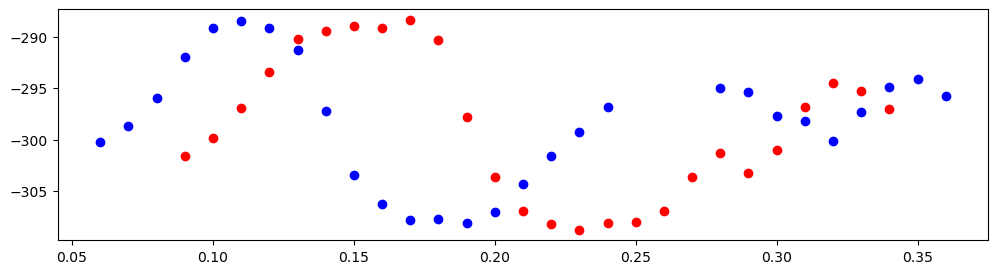

In [381]:
plt.figure(figsize=(12, 3))

plt.plot(side1_run1_depth[7:35]-141, side1_run1_dD[7:35] ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(side2_orig_depth[83:109]-141, side2_orig_dD[83:109], 'ro')#, legend_label='Sample Set #2 (OSU)')



In [382]:
depth_side1_14106 = side1_run1_depth[7:35]-141
dD_side1_14106 = side1_run1_dD[7:35]

depth_side2_14106 = side2_orig_depth[83:109]-141
dD_side2_14106 = side2_orig_dD[83:109]

shift = 0.04

depth_side2_14106_shifted = depth_side2_14106 - shift
dD_side2_14106_shifted = dD_side2_14106 

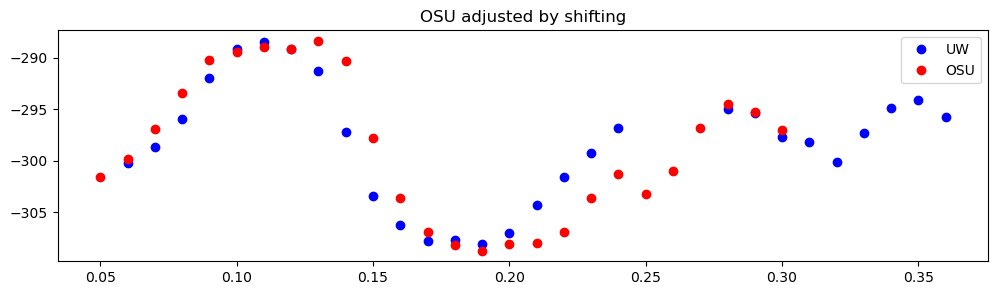

In [383]:
plt.figure(figsize=(12, 3))

plt.plot(depth_side1_14106, dD_side1_14106 ,'bo', label='UW')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(depth_side2_14106_shifted, dD_side2_14106_shifted , 'ro', label='OSU')#, legend_label='Sample Set #2 (OSU)')

plt.title('OSU adjusted by shifting') 
plt.legend()

In [384]:
change = np.linspace(0.85, 1.15, 20)

In [385]:
change


array([0.85      , 0.86578947, 0.88157895, 0.89736842, 0.91315789,
       0.92894737, 0.94473684, 0.96052632, 0.97631579, 0.99210526,
       1.00789474, 1.02368421, 1.03947368, 1.05526316, 1.07105263,
       1.08684211, 1.10263158, 1.11842105, 1.13421053, 1.15      ])

In [386]:
depth2 = np.flip(depth_side1_14106)
depth1 = depth_side2_14106_shifted
iso2 = np.flip(dD_side1_14106)
iso1 = dD_side2_14106_shifted

new_depth = depth1 * change[10]

linear_interpolation_func = interpolate.interp1d(new_depth, iso1, kind='linear')
linear_interpolated_y = linear_interpolation_func(new_depth)

corr = max(np.abs(sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False)))
sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False)

array([ 0.17563477, -0.09668596, -0.35176859, -0.53034227, -0.59811642,
       -0.56901479, -0.47742923, -0.35831895, -0.23434307, -0.12830575,
       -0.0598643 , -0.01731194,  0.00857983,  0.03788652,  0.07099404,
        0.08889881,  0.0876842 ,  0.07875   ,  0.08198143,  0.08723365,
        0.07613117,  0.05137258,  0.01476896, -0.00811656, -0.01318396,
       -0.00653632])

In [387]:
corr

0.5981164192485355

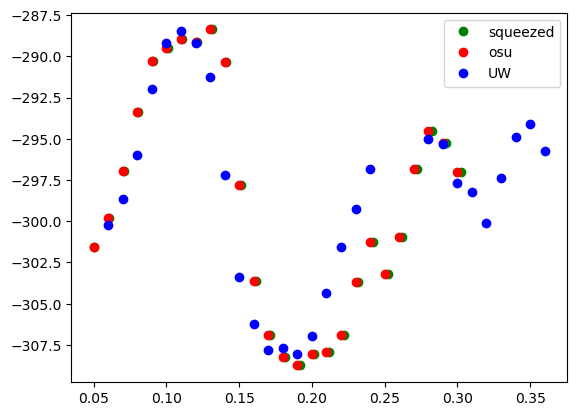

In [388]:
plt.plot(new_depth, linear_interpolated_y, 'go', label='squeezed')
plt.plot(depth1, iso1, 'ro', label='osu')
plt.plot(depth2, iso2, 'bo', label='UW')
plt.legend()

In [390]:
# creating a new range of interpolation
min_depth = np.max([np.min(new_depth), np.min(depth2)])
max_depth = np.min([np.max(new_depth), np.max(depth2)])
interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))

linear_interpolation_func = interpolate.interp1d(interp_depth, iso1, kind='linear')
linear_interpolated_y = linear_interpolation_func(interp_depth)

corr = max(np.abs(sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False)))
sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False)

array([ 0.17563477, -0.09668596, -0.35176859, -0.53034227, -0.59811642,
       -0.56901479, -0.47742923, -0.35831895, -0.23434307, -0.12830575,
       -0.0598643 , -0.01731194,  0.00857983,  0.03788652,  0.07099404,
        0.08889881,  0.0876842 ,  0.07875   ,  0.08198143,  0.08723365,
        0.07613117,  0.05137258,  0.01476896, -0.00811656, -0.01318396,
       -0.00653632])

In [391]:
corr

0.5981164192485355

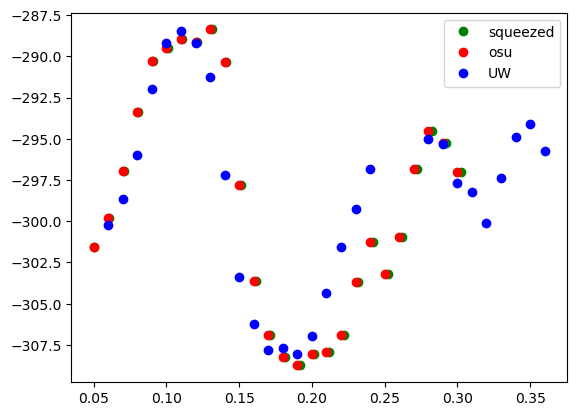

In [392]:
plt.plot(new_depth, linear_interpolated_y, 'go', label='squeezed')
plt.plot(depth1, iso1, 'ro', label='osu')
plt.plot(depth2, iso2, 'bo', label='UW')
plt.legend()

In [394]:
depth2 = np.flip(depth_side1_14106)
depth1 = depth_side2_14106_shifted
iso2 = np.flip(dD_side1_14106)
iso1 = dD_side2_14106_shifted

min_depth = max(np.min(depth2), np.min(new_depth))
max_depth = min(np.max(depth2), np.max(new_depth))
interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
linear_interpolation_func = interpolate.interp1d(new_depth, iso1, kind='linear')
linear_interpolated_y = linear_interpolation_func(interp_depth)

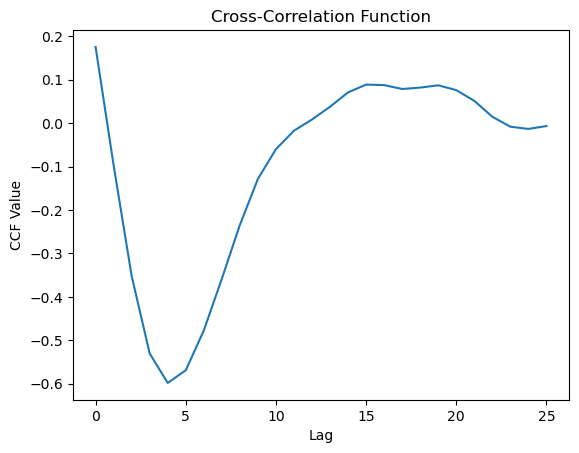

In [395]:
import numpy as np
from scipy import interpolate
import statsmodels.api as sm
import matplotlib.pyplot as plt

depth2 = np.flip(depth_side1_14106)-141
depth1 = depth_side2_14106_shifted-141
iso2 = np.flip(dD_side1_14106)
iso1 = dD_side2_14106_shifted

new_depth = depth1 * 0.9

min_depth = np.max([np.min(new_depth), np.min(depth2)])
max_depth = np.min([np.max(new_depth), np.max(depth2)])
interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))

linear_interpolation_func = interpolate.interp1d(interp_depth, iso1, kind='linear')
linear_interpolated_y = linear_interpolation_func(interp_depth)


ccf_values = sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False)


plt.plot(ccf_values)
plt.xlabel("Lag")
plt.ylabel("CCF Value")
plt.title("Cross-Correlation Function")
plt.show()


In [396]:
import numpy as np
from scipy import interpolate
import statsmodels.api as sm

def calculate_cross_correlation(iso1, iso2, depth1, depth2):
    depth2 = depth2 - 141
    depth1 = depth1 - 141
    change = np.linspace(0.8, 1.1, 20)
    correlation = np.array([])
    for i in range(len(change)):
        new_depth = depth1 * change[i]
    
        min_depth = max(np.min(depth2), np.min(new_depth))
        max_depth = min(np.max(depth2), np.max(new_depth))
        interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    
        linear_interpolation_func = interpolate.interp1d(new_depth, iso1, kind='linear')
        linear_interpolated_y = linear_interpolation_func(interp_depth)
    
        corr = max(sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False))
        correlation.append(corr)
        
    return correlation


In [397]:
np.shape(side1_run1_depth)

(265,)

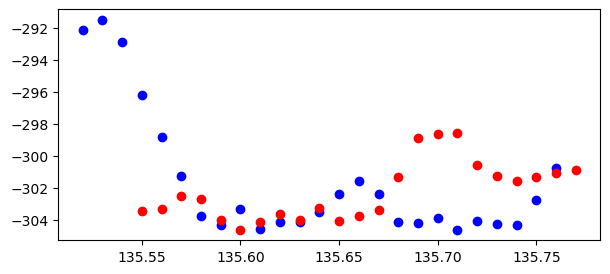

In [398]:
plt.figure(figsize=(7, 3))

plt.plot(side1_run1_depth[165:190], side1_run1_dD[165:190] ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(side2_orig_depth[111:134], side2_orig_dD[111:134], 'ro')#, legend_label='Sample Set #2 (OSU)')


In [399]:
depth_side1_13555 = side1_run1_depth[165:190]-135
dD_side1_13555 = side1_run1_dD[165:190]

depth_side2_13555 = side2_orig_depth[111:134]-135
dD_side2_13555 = side2_orig_dD[111:134]

shift = 0.08


depth_side2_13555_shifted = depth_side2_13555 + shift
# dD_side2_13555_shifted  

Text(0.5, 1.0, 'Original Depth Assignments (201-2)')

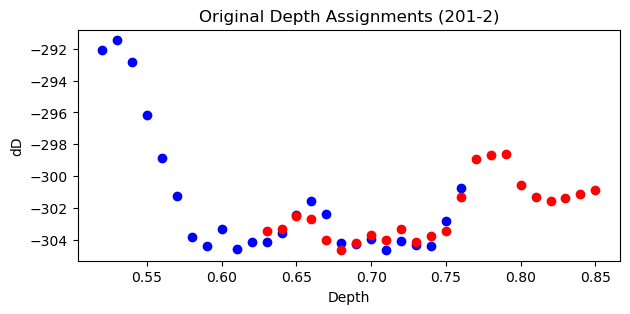

In [400]:
plt.figure(figsize=(7, 3))

plt.plot(depth_side1_13555, dD_side1_13555 ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(depth_side2_13555+shift, dD_side2_13555, 'ro')#, legend_label='Sample Set #2 (OSU)')

plt.xlabel('Depth')
plt.ylabel('dD')
plt.title('Original Depth Assignments (201-2)') 

In [401]:
corr = max(sm.tsa.stattools.ccf(iso2, ynew, adjusted=False))


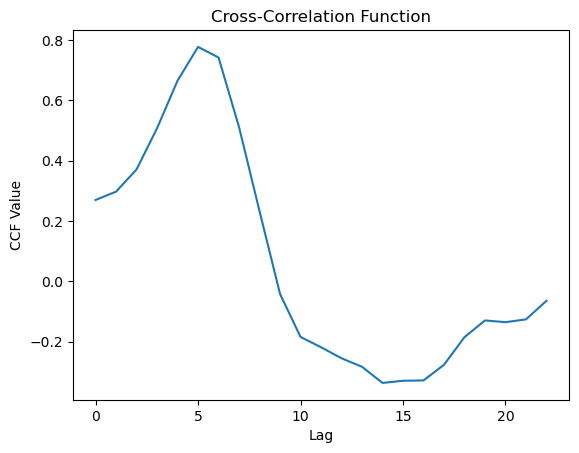

In [402]:
depth2 = np.flip(depth_side1_13555)
depth1 = depth_side2_13555_shifted
iso2 = np.flip( dD_side1_13555)
iso1 = dD_side2_13555

new_depth = depth1 *0.85

min_depth = np.max([np.min(new_depth), np.min(depth2)])
max_depth = np.min([np.max(new_depth), np.max(depth2)])

interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))

linear_interpolation_func = interpolate.interp1d(interp_depth, iso1, kind='linear')
linear_interpolated_y = linear_interpolation_func(interp_depth)


ccf_values = sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False)


plt.plot(ccf_values)
plt.xlabel("Lag")
plt.ylabel("CCF Value")
plt.title("Cross-Correlation Function")
plt.show()

In [403]:
corr = max(sm.tsa.stattools.ccf(iso2, linear_interpolated_y, adjusted=False))
corr

0.7770039977595544

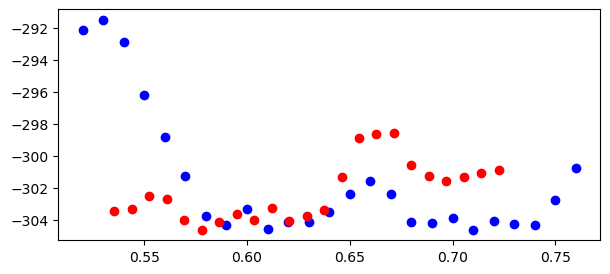

In [404]:
plt.figure(figsize=(7, 3))

plt.plot(depth_side1_13555, dD_side1_13555 ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(new_depth, linear_interpolated_y, 'ro')#, legend_label='Sample Set #2 (OSU)')


In [405]:
depth2 = np.flip(depth_side1_13555)
depth1 = depth_side2_13555_shifted
iso2 = np.flip( dD_side1_13555)
iso1 = dD_side2_13555_shifted

x = depth1
y = iso1

change = np.linspace(0.8, 1.2, 20)
change

array([0.8       , 0.82105263, 0.84210526, 0.86315789, 0.88421053,
       0.90526316, 0.92631579, 0.94736842, 0.96842105, 0.98947368,
       1.01052632, 1.03157895, 1.05263158, 1.07368421, 1.09473684,
       1.11578947, 1.13684211, 1.15789474, 1.17894737, 1.2       ])

In [406]:
new_depth = depth1 * change[17]


xnew = new_depth
ynew = np.interp(xnew, x, y)

In [407]:
# xnew

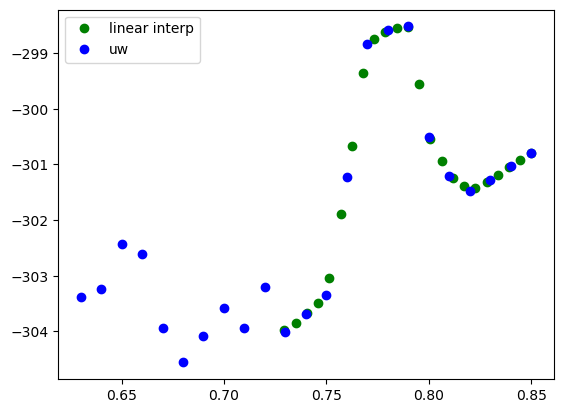

In [408]:

min_depth = np.max([np.min(xnew), np.min(x)])
max_depth = np.min([np.max(xnew), np.max(x)])

interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))

# linear_interpolation_func = interpolate.interp1d(interp_depth, iso1, kind='linear')
# linear_interpolated_y = linear_interpolation_func(interp_depth)

ynew = np.interp(interp_depth, x, y)

ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)

plt.plot(interp_depth, ynew, 'go', label='linear interp')
plt.plot(x, y, 'bo', label='uw')
plt.legend(loc='best')
plt.show()


In [409]:
corr = max(sm.tsa.stattools.ccf(iso2, ynew, adjusted=False))
corr

0.7348736204269677

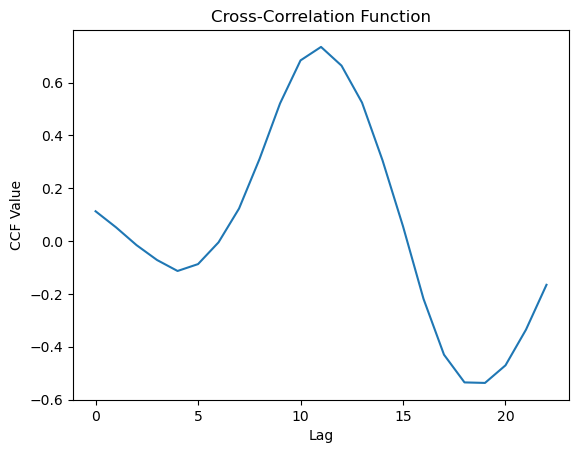

In [410]:
plt.plot(ccf_values)
plt.xlabel("Lag")
plt.ylabel("CCF Value")
plt.title("Cross-Correlation Function")
plt.show()

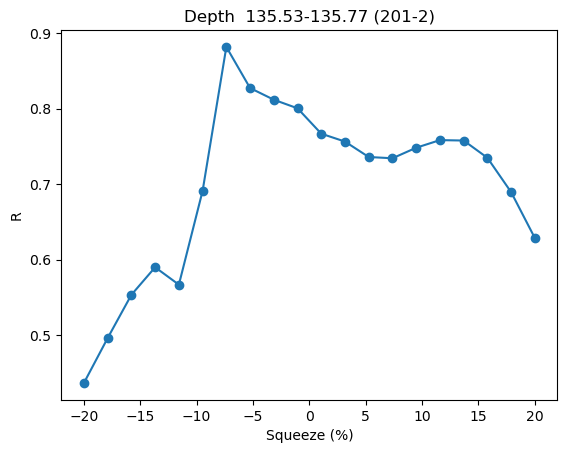

In [411]:


depth2 = np.flip(depth_side1_13555)
depth1 = depth_side2_13555_shifted
iso2 = np.flip(dD_side1_13555)
iso1 = dD_side2_13555_shifted

x = depth1
y = iso1

change = np.linspace(0.8, 1.2, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = depth1 * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Squeeze (%)')
plt.ylabel('R')
plt.title('Depth  135.53-135.77 (201-2)')
plt.show()


In [412]:
max(correlation_values)

0.8817666601783283

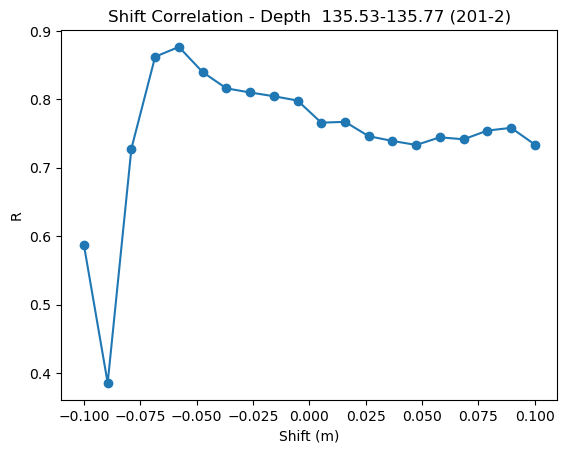

In [413]:


depth2 = np.flip(depth_side1_13555)
depth1 = depth_side2_13555_shifted
iso2 = np.flip(dD_side1_13555)
iso1 = dD_side2_13555_shifted

x = depth1
y = iso1

change = np.linspace(-0.1, 0.1, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = depth1 + change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot(change, correlation_values, marker='o', linestyle='-')
plt.xlabel('Shift (m)')
plt.ylabel('R')
plt.title('Shift Correlation - Depth  135.53-135.77 (201-2)')
plt.show()


In [414]:

# Calculate the index of the maximum correlation value
best_index = correlation_values.index(max(correlation_values))

# Get the corresponding 'change' value at the best index
best_shift = change[best_index]

# Output the index and corresponding 'change' value with the maximum correlation
print("Index of Max Correlation Value:", best_index)
print("Corresponding 'change' value:", best_shift)


Index of Max Correlation Value: 4
Corresponding 'change' value: -0.05789473684210527


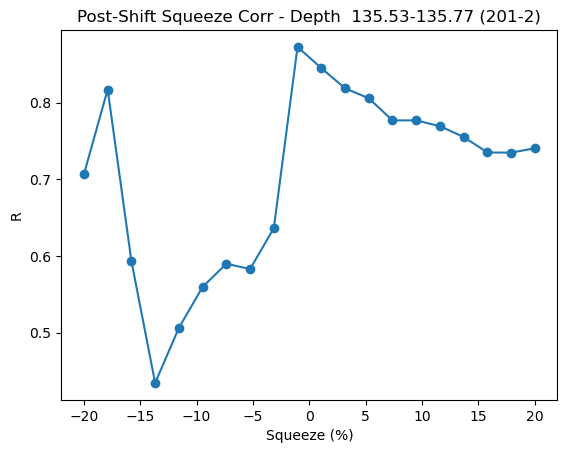

In [415]:
# here I am trying to use the 

x = depth1
y = iso1

change = np.linspace(0.8, 1.2, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = (depth1+best_shift) * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Squeeze (%)')
plt.ylabel('R')
plt.title('Post-Shift Squeeze Corr - Depth  135.53-135.77 (201-2)')
plt.show()


In [416]:
max(correlation_values)

0.8728439246773445

## Redoing the previous depth at 141

In [417]:
depth_side1_14106 = side1_run1_depth[7:35]-141
dD_side1_14106 = side1_run1_dD[7:35]

depth_side2_14106 = side2_orig_depth[83:109]-141
dD_side2_14106 = side2_orig_dD[83:109]



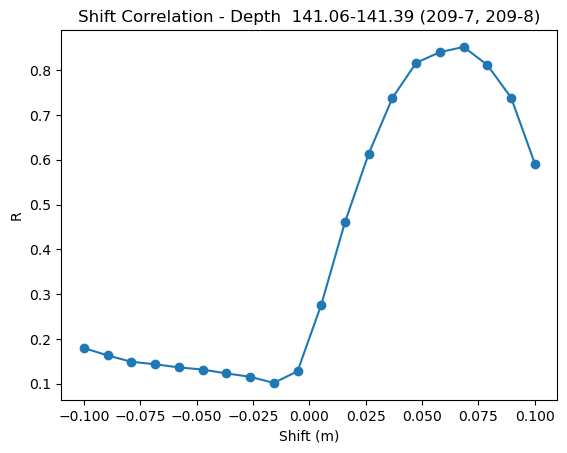

In [418]:
depth2 = np.flip(depth_side1_14106)
depth1 = depth_side2_14106
iso2 = np.flip(dD_side1_14106)
iso1 = dD_side2_14106

x = depth1
y = iso1

change = np.linspace(-0.1, 0.1, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = depth1 + change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot(change, correlation_values, marker='o', linestyle='-')
plt.xlabel('Shift (m)')
plt.ylabel('R')
plt.title('Shift Correlation - Depth  141.06-141.39 (209-7, 209-8)')
plt.show()


In [419]:
max(correlation_values)

0.8518361849355539

In [422]:

# Calculate the index of the maximum correlation value
best_index = correlation_values.index(max(correlation_values))

# Get the corresponding 'change' value at the best index
best_shift = change[best_index]

# Output the index and corresponding 'change' value with the maximum correlation
print("Index of Max Correlation Value:", best_index)
print("Corresponding 'change' value:", best_shift)


Index of Max Correlation Value: 16
Corresponding 'change' value: 0.06842105263157894


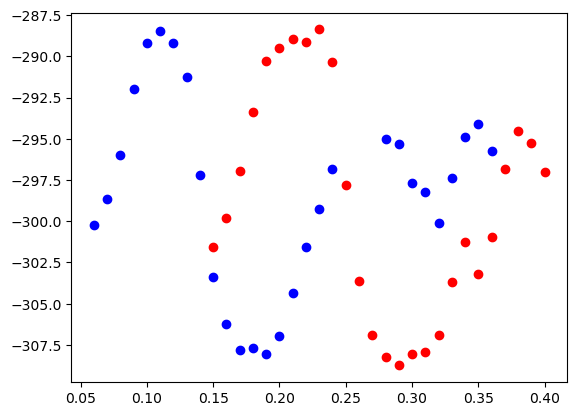

In [423]:
depth2 = np.flip(depth_side1_14106)
depth1 = depth_side2_14106
iso2 = np.flip(dD_side1_14106)
iso1 = dD_side2_14106
plt.plot(depth2, iso2, 'bo')
plt.plot(depth1+0.06, iso1, 'ro')

#

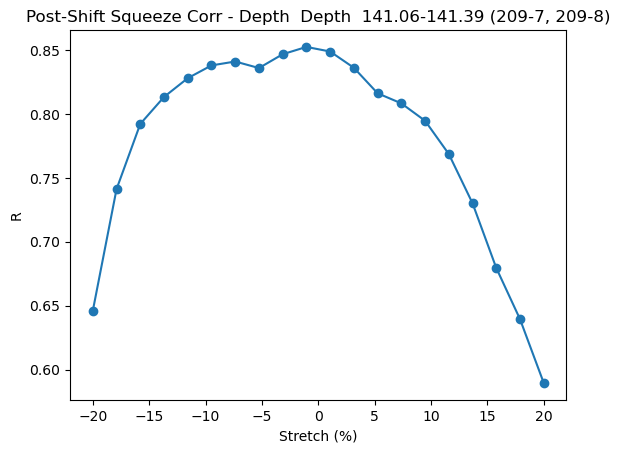

In [424]:
# here I am trying to use the 

x = depth1
y = iso1

change = np.linspace(0.8, 1.2, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = (depth1+best_shift) * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Stretch (%)')
plt.ylabel('R')
plt.title('Post-Shift Squeeze Corr - Depth  Depth  141.06-141.39 (209-7, 209-8)')
plt.show()


In [425]:
max(correlation_values)

0.852405495596117

Depths  139.4 - 139.61

Text(0.5, 1.0, '207-6 and 207-7 Original Depth Assignment')

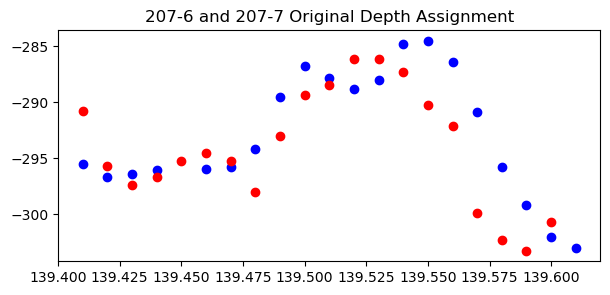

In [426]:
plt.figure(figsize=(7, 3))

plt.plot(side1_run1_depth[70:90], side1_run1_dD[70:90] ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(side2_orig_depth[20:40], side2_orig_dD[20:40], 'ro')#, legend_label='Sample Set #2 (OSU)')

plt.title('207-6 and 207-7 Original Depth Assignment')

In [338]:
depth_side1_13940 = side1_run1_depth[70:90]-139
dD_side1_13940 = side1_run1_dD[70:90]

depth_side2_13940 = side2_orig_depth[20:40]-139
dD_side2_13940 = side2_orig_dD[20:40]



In [348]:
# original correlation value
ccf_values = sm.tsa.stattools.ccf(dD_side1_13940, dD_side2_13940, adjusted=False)
corr = max(ccf_values)
corr

0.8459751236697939

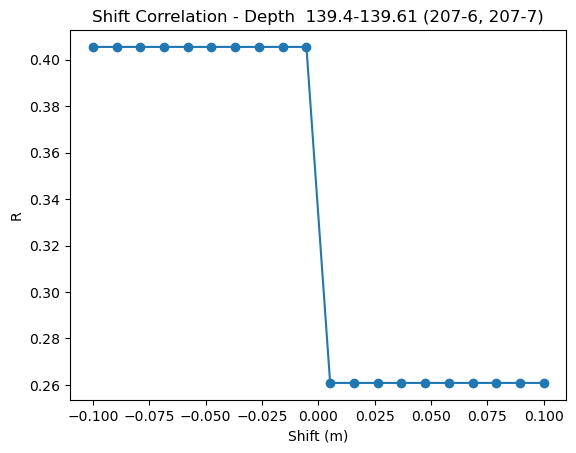

In [350]:
depth2 = np.flip(depth_side1_13940)
depth1 = depth_side2_13940
iso2 = np.flip(dD_side1_13940)
iso1 = dD_side2_13940

x = depth1
y = iso1

change = np.linspace(-0.1, 0.1, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = depth1 + change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot(change, correlation_values, marker='o', linestyle='-')
plt.xlabel('Shift (m)')
plt.ylabel('R')
plt.title('Shift Correlation - Depth  139.4-139.61 (207-6, 207-7)')
plt.show()


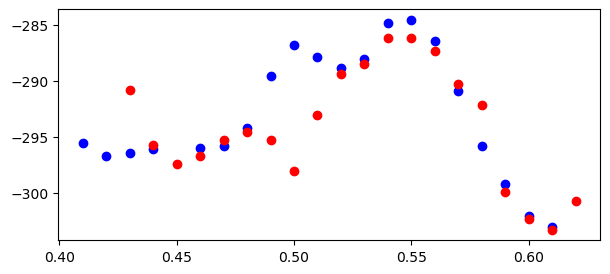

In [343]:
plt.figure(figsize=(7, 3))

plt.plot(depth_side1_13940, dD_side1_13940 ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(depth_side2_13940+0.02, dD_side2_13940, 'ro')#, legend_label='Sample Set #2 (OSU)')

plt.title('

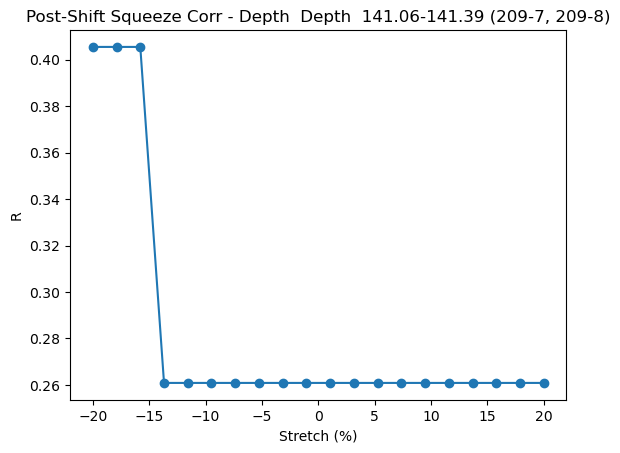

In [351]:
# here I am trying to use the 

x = depth1
y = iso1

change = np.linspace(0.8, 1.2, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = (depth1+best_shift) * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Stretch (%)')
plt.ylabel('R')
plt.title('Post-Shift Squeeze Corr - Depth  Depth  141.06-141.39 (209-7, 209-8)')
plt.show()


In [353]:
new_depth = (depth1+best_shift) * 1
    
xnew = new_depth
ynew = np.interp(xnew, x, y)
    
min_depth = np.max([np.min(xnew), np.min(x)])
max_depth = np.min([np.max(xnew), np.max(x)])
    
interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
ynew = np.interp(interp_depth, x, y)
    
ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
corr = max(ccf_values)

In [354]:
corr

0.2608703390550687